<a href="https://colab.research.google.com/github/rishio5/Online_Payment_Fraud_Detection/blob/main/onlinepaymentfrauddetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Title:Online Payment Fraud Detection using Machine Learning in Python

In [ ]:
# The dataset we will be using have these columns -

# Feature - Description
# step - tells about the unit of time
# type - type of transaction done
# amount - the total amount of transaction
# nameOrg - account that starts the transaction
# oldbalanceOrg - Balance of the account of sender before transaction
# newbalanceOrg - Balance of the account of sender after transaction
# nameDest - account that receives the transaction
# oldbalanceDest - Balance of the account of receiver before transaction
# newbalanceDest - Balance of the account of receiver after transaction
# isFraud	The value to be predicted i.e. 0 or 1

In [ ]:
#Importing Libraries and Datasets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/new_data.csv', on_bad_lines='skip')
data.head()

<ipython-input-7-f7cbb7476925>:1: DtypeWarning: Columns (0,2,4,5,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/new_data.csv', on_bad_lines='skip')


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7478065 entries, 0 to 7478064
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            object 
 1   type            object 
 2   amount          object 
 3   nameOrig        object 
 4   oldbalanceOrg   object 
 5   newbalanceOrig  object 
 6   nameDest        object 
 7   oldbalanceDest  object 
 8   newbalanceDest  object 
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(2), object(9)
memory usage: 627.6+ MB


In [ ]:
#mean, count , minimum and maximum values of the data.

In [ ]:
data.describe()

,isFraud,isFlaggedFraud
count,7.478008e+06,7.477990e+06
mean,1.642817e-03,3.878047e-06
std,4.049838e-02,1.969272e-03
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00


In [ ]:
#Data Visualization

In [ ]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 9
Integer variables: 0
Float variables: 2


In [ ]:
#count plot of the Payment type column using Seaborn library.

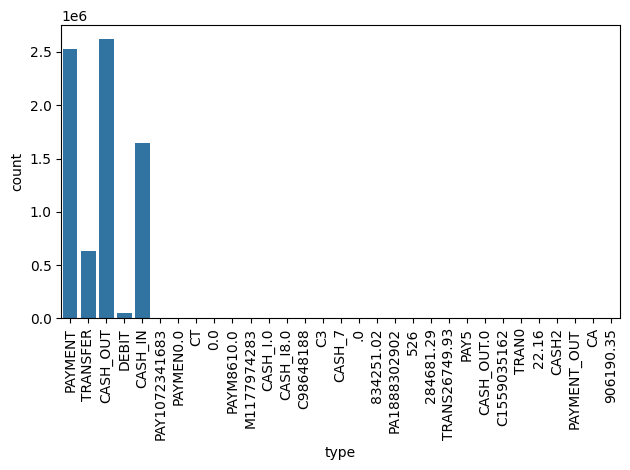

In [ ]:
sns.countplot(x='type', data=data)
plt.xticks(rotation='vertical')  # Rotate labels top-down
plt.tight_layout()  # Prevent label cut-off
plt.show()


In [ ]:
#bar plot for analyzing Type and amount column simultaneously.

In [ ]:
# Check sample of bad data
print(data['amount'].loc[data['amount'].str.contains(r'[^0-9.]', regex=True, na=False)])

# Clean the amount column
data['amount'] = pd.to_numeric(data['amount'], errors='coerce')

# Optional: Drop rows where conversion failed (malformed strings)
data = data.dropna(subset=['amount'])


262714          1.0E7
262816          1.0E7
263414          1.0E7
263658          1.0E7
263777          1.0E7
              ...    
2223182         1.0E7
2223183         1.0E7
2223184         1.0E7
2223185         1.0E7
2225478    M463193135
Name: amount, Length: 162, dtype: object


In [ ]:
data['isFraud'].value_counts()

,count
isFraud,
0.0,7465720
1.0,12285


<Axes: >

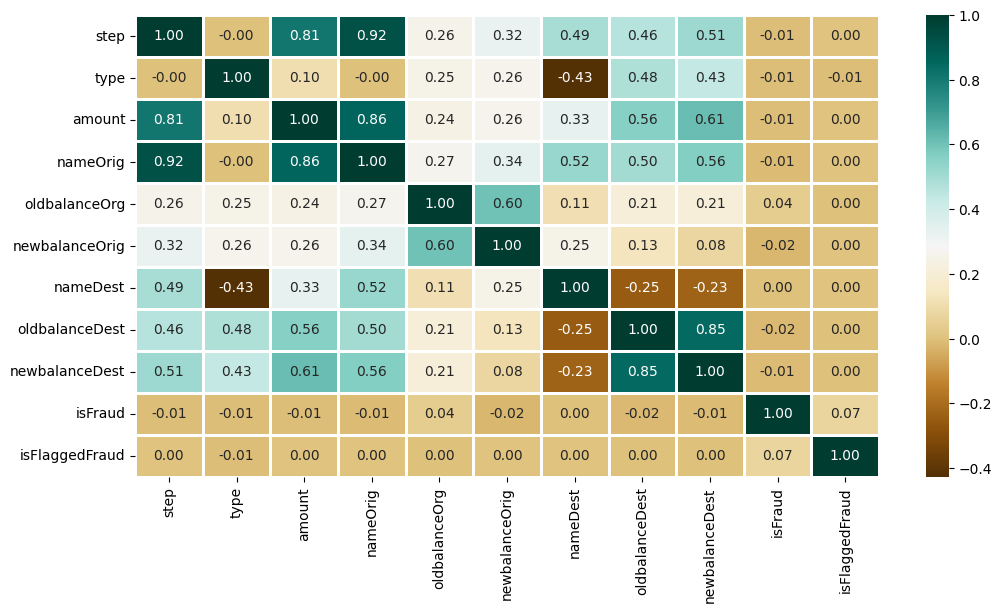

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.apply(lambda x: pd.factorize(x)[0]).corr(),
			cmap='BrBG',
			fmt='.2f',
			linewidths=2,
			annot=True)

In [ ]:
#Data Preprocessing

In [ ]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,M1177974283,PA1888302902,PAY1072341683,PAY5,PAYM8610.0,PAYMEN0.0,PAYMENT,PAYMENT_OUT,TRAN0,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
# drop the irrelevant columns

In [ ]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

In [ ]:
X.shape, y.shape

((7478056, 32), (7478056,))

In [ ]:
#split the data into 2 parts : Training and Testing.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [ ]:
# #Model Training
# Models Used:
# LogisticRegression
# XGBClassifier
# SVC
# RandomForestClassifier

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras

In [ ]:
# ---------- Step 1: Remove string (object) columns ----------
X_train = X_train.select_dtypes(exclude=['object'])
X_test = X_test.select_dtypes(exclude=['object'])

In [27]:
# ----- Step 2: Replace NaN values with mean -----
imputer = SimpleImputer(strategy='mean')

In [28]:
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

In [29]:
y_train = y_train.dropna()
y_test = y_test.dropna()

In [30]:
X_test = test_df.drop('target', axis=1)
y_test = test_df['target']

In [ ]:
#Model Evaluation

In [32]:
models = [
    LogisticRegression(),
    XGBClassifier(),
    RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)
]

for model in models:
    model.fit(X_train, y_train)
    print(f'{model} :')

    train_preds = model.predict_proba(X_train)[:, 1]
    print('Training Accuracy : ', ras(y_train, train_preds))

    y_preds = model.predict_proba(X_test)[:, 1]
    print('Validation Accuracy : ', ras(y_test, y_preds))
    print()

LogisticRegression() :
Training Accuracy :  0.8089702677255214
Validation Accuracy :  0.8095049670386009

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) :
Training Accuracy :  0.9276511017709332
Validation Accuracy :  0.9217557585512632

RandomForestClassifier(criterion='entropy', n_estim

In [ ]:
#The best-performed model is XGBClassifier. Confusion Matrix for the same.

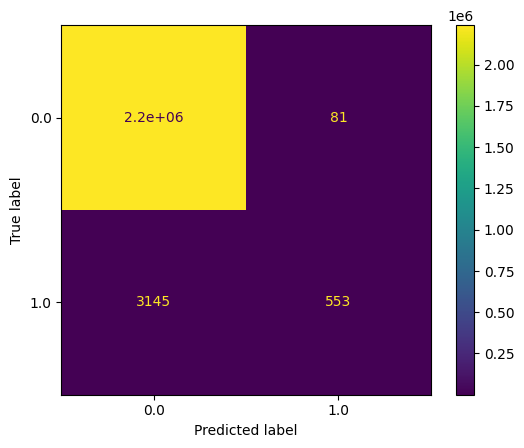

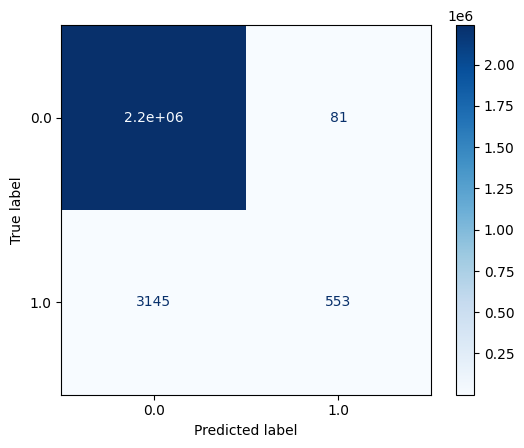

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = ConfusionMatrixDisplay.from_estimator(models[1], X_test, y_test)

cm.plot(cmap='Blues')

plt.show()